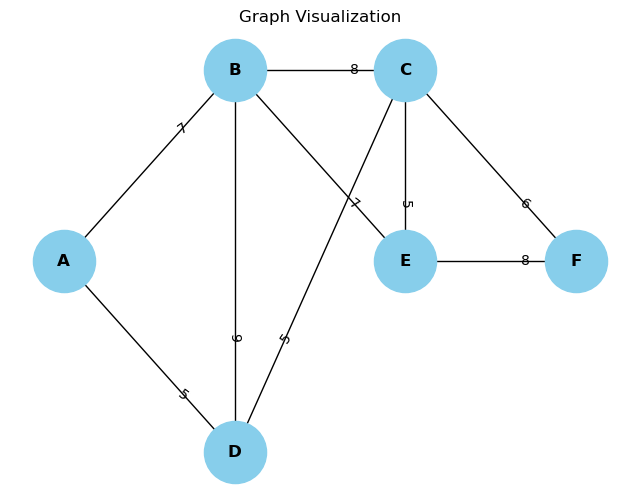

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 데이터
graph = {
    'A': {'B': 7, 'D': 5},
    'B': {'A': 7, 'C': 8, 'D': 9, 'E': 7},
    'C': {'B': 8, 'D': 5, 'E': 5, 'F': 6},
    'D': {'A': 5, 'B': 9, 'C': 5},
    'E': {'B': 7, 'C': 5, 'F': 8},
    'F': {'C': 6, 'E': 8}
}

# 네트워크X 그래프 객체 생성
G = nx.Graph()

# 각 노드 추가
for node in graph:
    G.add_node(node)

# 각 간선 추가
for node in graph:
    for neighbor, weight in graph[node].items():
        G.add_edge(node, neighbor, weight=weight)

# 노드 위치 정의 (예시 위치)
pos = {
    'A': (0, 0),
    'B': (1, 1),
    'C': (2, 1),
    'D': (1, -1),
    'E': (2, 0),
    'F': (3, 0)
}

# 그래프 그리기
plt.figure(figsize=(8, 6))

# 간선 가중치 표시
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=10)

nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold')

plt.title('Graph Visualization')
plt.axis('off')
plt.show()


In [10]:
import heapq
from collections import defaultdict
import math


graph = {
    'A': {'B': 7, 'D': 5},
    'B': {'A': 7, 'C': 8, 'D': 9, 'E': 7},
    'C': {'B': 8, 'D': 5, 'E': 5, 'F': 6},
    'D': {'A': 5, 'B': 9, 'C': 5},
    'E': {'B': 7, 'C': 5, 'F': 8},
    'F': {'C': 6, 'E': 8}
}

def dijkstra(graph, start_node):
    # 시작노드에서 다른 모든 노드까지의 최소 거리를 저장할 dict
    min_distances = defaultdict(int)
    for node in graph.keys():
        min_distances[node] = math.inf
    # 시작노드에서 시작 노드로의 최소거리는 0
    min_distances[start_node] = 0
    
    # 우선순위 큐에 [0,start_node]를 넣음
    priority_queue = []
    priority_queue.append([0, start_node])
    
    # 우선순위큐가 차있을 동안
    while priority_queue:
        # 현재노드 정보  pop
        distance_to_now_node, now_node = heapq.heappop(priority_queue)
        print(f'now_node: {now_node}')
        print(f'distance_to_now_node: {distance_to_now_node}')
        # 현재 노드까지의 거리가 min_distances의 거리보다 크면 패스
        if distance_to_now_node > min_distances[now_node]:
            print(f'min_distances[now_node]: {min_distances[now_node]}')
            print(f'distance_to_now_node is larger than min_distances[now_node]')
            continue
        # 현재 노드까지의 거리가 min_distances에 등록된 거리보다 작다면
        # 현재 노드와 연결된 다른 노드들을 확인
        for next_node, distance in graph[now_node].items():
            # 다음 노드까지의 거리는 현재 노드까지의 거리 + distance
            distance_to_next_node = distance_to_now_node + distance
            # 다음 노드까지의 거리가 min_distances에 등록된 거리보다 작다면
            if distance_to_next_node < min_distances[next_node]:
                # min_distances를 갱신하고 다음 노드를 우선순위큐에 추가
                min_distances[next_node] = distance_to_next_node
                heapq.heappush(priority_queue, [distance_to_next_node, next_node])
    return min_distances

start_node = 'B'
dijkstra(graph, start_node)

now_node: B
distance_to_now_node: 0
now_node: A
distance_to_now_node: 7
now_node: E
distance_to_now_node: 7
now_node: C
distance_to_now_node: 8
now_node: D
distance_to_now_node: 9
now_node: F
distance_to_now_node: 14
now_node: F
distance_to_now_node: 15
min_distances[now_node]: 14
distance_to_now_node is larger than min_distances[now_node]


defaultdict(int, {'A': 7, 'B': 0, 'C': 8, 'D': 9, 'E': 7, 'F': 14})